## Exploring Audio Features

In [5]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.insert(0, '../../')
from library.notebook_api.data_loader import  ModelDataLoader,CombinedDataLoader
from library.source_data.feature_extractor import AudioFeatureExtractor
from library.source_data.parallel_processor import AudioParallelProcessor
import librosa
import matplotlib.pyplot as plt



In [2]:
#instantate data_loader and the dataframes it makes available 
data_loader = CombinedDataLoader('small')
df = data_loader.df
df_files_available = data_loader.df_files_available
df_genres_available = data_loader.df_genres_available
df_filtered = data_loader.df_filtered

tracks in meta 107574
tracks with files available in project_data_path:  9000
tracks with top level genres available 50598
tracks with genres and files (df_filtered) 9000


/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/notebooks/exploratory/../../library/notebook_api/data_loader.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.df_filtered = self.df_files_available[self.df.label.isnull() ==False ]


In [3]:
audio = AudioFeatureExtractor(df_filtered.head(5))
audio.add_audio_data_to_df()
audio.add_numerical_features_to_df()
audio.add_mfcc_to_df()

/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/notebooks/exploratory/../../library/source_data/feature_extractor.py:118: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]


In [59]:
mfccs_ = audio.df['mfcc'].iloc[4]#[0: int(len(mfccs)/4)]
audio_ = audio.df['audio'].iloc[4]
sr_ = audio.df['sampling_rate'].iloc[4]

In [54]:
len(mfccs_)

13

In [55]:
mfccs_.shape

(13, 2582)

In [80]:
S = librosa.feature.melspectrogram(y=audio_[0:int(len(audio_)/4)], sr=sr_, n_mels=128, fmax=8000)

mfccs = np.array([mfcc[0:int(len(mfcc)/4)] for mfcc in mfccs_])
mfccs.shape

(13, 645)

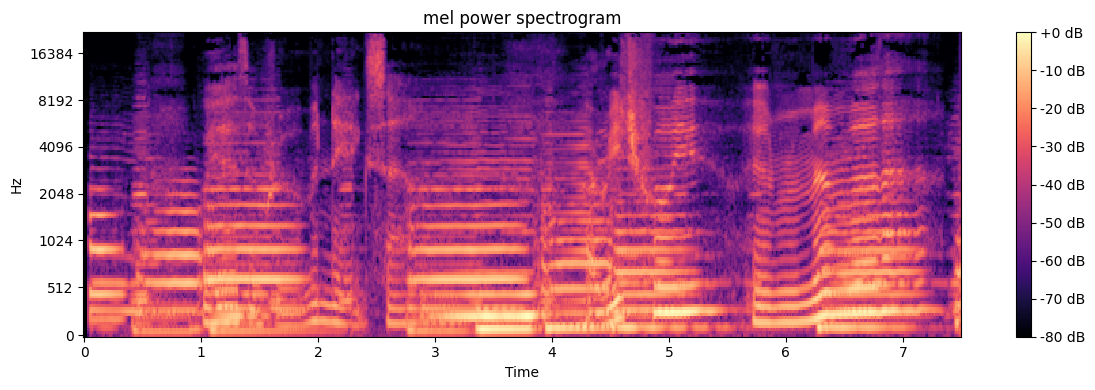

In [81]:
# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr_, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [83]:
log_S.shape

(128, 646)

[Text(0.5, 1.0, 'MFCC')]

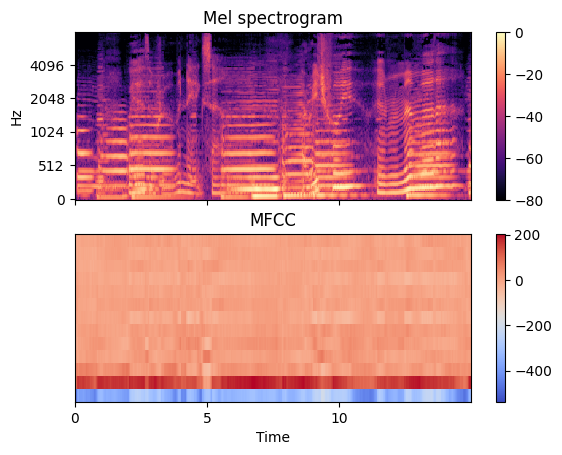

In [82]:
fig, ax = plt.subplots(nrows=2, sharex=True)
#'''
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
        
fig.colorbar(img, ax=[ax[0]])
#'''
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')